In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [3]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2025-11-23 14:23:41--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  10.5MB/s    in 0.5s    

2025-11-23 14:23:42 (10.5 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [5]:
df = pd.read_csv('bbc_text_cls.csv')

In [6]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [7]:
inputs = df["text"]
labels = df["labels"]

#EDA - Exploratory Data Analysis

<Axes: >

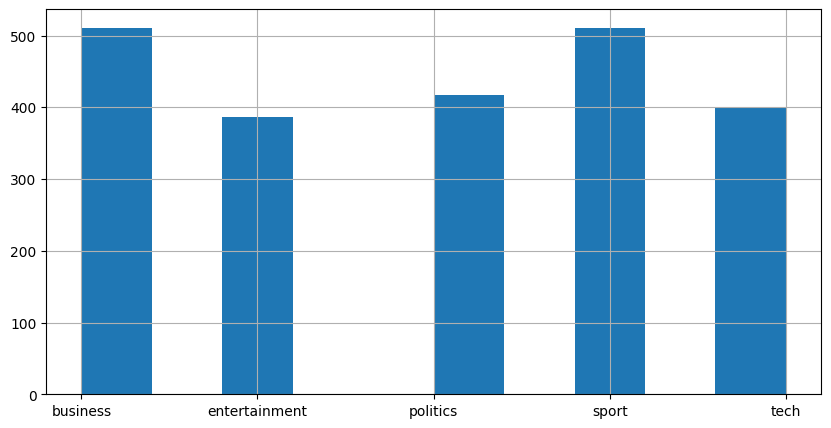

In [8]:
labels.hist(figsize=(10,5))

In [9]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

inputs_train

In [10]:
inputs_train

,text
1137,Whitehall shredding increasing - Tories\n\nCiv...
1394,Greek duo cleared in doping case\n\nSprinters ...
800,U2 stars enter rock Hall of Fame\n\nSinger Bru...
2138,Warning over tsunami aid website\n\nNet users ...
1535,Benitez delight after crucial win\n\nLiverpool...
...,...
1147,Blair 'said he would stand down'\n\nTony Blair...
2154,IBM puts cash behind Linux push\n\nIBM is spen...
1766,Hingis hints at playing comeback\n\nMartina Hi...
1122,Clarke faces ID cards rebellion\n\nCharles Cla...


inputs_test

In [11]:
inputs_test

,text
717,Duran Duran show set for US TV\n\nChart stars ...
798,Musicians to tackle US red tape\n\nMusicians' ...
1330,Merritt close to indoor 400m mark\n\nTeenager ...
18,India widens access to telecoms\n\nIndia has r...
1391,Wada will appeal against ruling\n\nThe World A...
...,...
1636,Leeds v Saracens (Fri)\n\nHeadingley\n\nFriday...
1422,Kenyon denies Robben Barca return\n\nChelsea c...
1982,Freeze on anti-spam campaign\n\nA campaign by ...
2005,Mobile gig aims to rock 3G\n\nForget about goi...


Ytrain

In [12]:
Ytrain

,labels
1137,politics
1394,sport
800,entertainment
2138,tech
1535,sport
...,...
1147,politics
2154,tech
1766,sport
1122,politics


Ytest

In [13]:
Ytest

,labels
717,entertainment
798,entertainment
1330,sport
18,business
1391,sport
...,...
1636,sport
1422,sport
1982,tech
2005,tech


In [14]:
vectorizer = CountVectorizer()

In [15]:
Xtrain = vectorizer.fit_transform(inputs_train)

Checking what Xtrain looks like

In [16]:
Xtrain

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 337411 stored elements and shape (1668, 26287)>

In [17]:
Xtest = vectorizer.transform(inputs_test)

Checking what Xtest looks like

In [18]:
Xtest

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 108374 stored elements and shape (557, 26287)>

In [19]:
(Xtrain != 0).sum()

np.int64(337411)

what percentage of values are non-zero

In [20]:
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

np.float64(0.007695239935415004)

In [21]:
model = MultinomialNB()

In [22]:
model.fit(Xtrain, Ytrain)

MultinomialNB()

In [23]:
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9922062350119905
test score:  0.9712746858168761


Adding stop words

In [24]:
vectorizer = CountVectorizer(stop_words="english")

In [25]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [26]:
model = MultinomialNB()

In [27]:
model.fit(Xtrain, Ytrain)

MultinomialNB()

In [28]:
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9928057553956835
test score:  0.9766606822262118


#Using Lemmatization

In [29]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith("J"):
    return wordnet.ADJ
  elif treebank_tag.startswith("V"):
    return wordnet.VERB
  elif treebank_tag.startswith("N"):
    return wordnet.NOUN
  elif treebank_tag.startswith("R"):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [30]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    # for word, tag in words_and_tags:
    #    return self.wnl.lemmatize(word, pos=get_wordnet_pos(tag))
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

with lemmatization

In [31]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

In [32]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
model = MultinomialNB()

In [34]:
model.fit(Xtrain, Ytrain)

MultinomialNB()

In [35]:
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9922062350119905
test score:  0.9676840215439856


#using StemTokenizer

In [37]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    # for t in token:
    #   return self.porter.stem(t)
    return [self.porter.stem(t) for t in tokens]

with steming

In [38]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())

In [39]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
model = MultinomialNB()

In [41]:
model.fit(Xtrain, Ytrain)

MultinomialNB()

In [42]:
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9892086330935251
test score:  0.9694793536804309


In [43]:
def simple_tokenizer(s):
  return s.split()

Using string split tokenizer

In [44]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)

In [45]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [46]:
model = MultinomialNB()

In [47]:
model.fit(Xtrain, Ytrain)

MultinomialNB()

In [48]:
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9952038369304557
test score:  0.9712746858168761
